# Defining the problem Statement

#  Extracting the Data

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [2]:
company=[]
rating=[]
offer=[]
price=[]
mrp=[]
reviews=[]
screen=[]
edition=[]
sound_output=[]
warranty=[]

for i in range(1,50):
    url = f"https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text)
        element = soup.find_all("div", class_="jIjQ8S")

        for j in element:

            
            a = j.find_all("div", class_="RG5Slk")
            if a:
                m = re.findall(r"^\w+", a[0].text)
                company.append(m[0] if m else np.nan)
            else:
                company.append(np.nan)

            
            b = j.find_all("div", class_="MKiFS6")
            rating.append(b[0].text if b else np.nan)

           
            c = j.find("span", string=re.compile(r"\d+%\s*off"))
            if c:
                m = re.search(r"(\d+%)", c.text)
                offer.append(m.group(1) if m else np.nan)
            else:
                offer.append(np.nan)

            
            d = j.find_all("div", class_="hZ3P6w DeU9vF")
            price.append(d[0].text if d else np.nan)

            
            e = j.find_all("div", class_="kRYCnD gxR4EY")
            mrp.append(e[0].text if e else np.nan)

            
            f = j.find("span", string=re.compile(r"\d+\s+Reviews"))
            if f:
                m = re.findall(r"\d+", f.text)
                reviews.append(m[0] if m else np.nan)
            else:
                reviews.append(np.nan)

            
            g = j.find_all("div", class_="RG5Slk")
            if g:
                m = re.findall(r"(\d+\s*cm\s*\(\d+\s*inch\))", g[0].text)
                screen.append(m[0] if m else np.nan)
            else:
                screen.append(np.nan)

            
            h = j.find_all("li", class_="DTBslk")
            text = j.text if h else ""

            
            m = re.findall(r"Launch Year:\s*(\d{4})", text)
            edition.append(m[0] if m else np.nan)

            
            m = re.findall(r"Total Sound Output:\s*([\d]+\s*W)", text)
            sound_output.append(m[0] if m else np.nan)

            
            m = re.findall(r"(\d+[-]?\s*Year)\s+.*Warranty", text, flags=re.I)
            warranty.append(m[0] if m else np.nan)


#  Creating a Data Frame 

In [3]:
import pandas as pd
data={"company":company,
"rating":rating, 
"offer":offer,
"price":price, 
"mrp":mrp,
"reviews":reviews,
"screen":screen,
"edition":edition,
"sound_output":sound_output,
"warranty":warranty}
df = pd.DataFrame(data)
df

,company,rating,offer,price,mrp,reviews,screen,edition,sound_output,warranty
0,XIAOMI,4,42%,"₹57,890","₹99,990",729,165 cm (65 inch),2025,34 W,NaN
1,Thomson,4.3,37%,"₹43,999","₹69,999",0,164 cm (65 inch),2025,70 W,1 Year
2,Thomson,4.3,55%,"₹4,499","₹9,999",6,NaN,2023,20 W,1 Year
3,TCL,4.1,55%,"₹44,490","₹98,990",24,139 cm (55 inch),2025,40 W,NaN
4,Thomson,4.3,36%,"₹31,999","₹49,999",0,139 cm (55 inch),2025,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
979,LG,NaN,41%,"₹49,990","₹84,990",NaN,7 cm (55 inch),2020,20 W,1 Year
980,Dish,NaN,48%,"₹24,965","₹48,499",NaN,22 cm (43 inch),2023,20 W,1 Year
981,LG,NaN,39%,"₹84,990","₹1,39,990",NaN,1 cm (65 inch),2021,20 W,1 Year
982,RGL,3.3,46%,"₹15,990","₹29,990",0,99 cm (39 inch),2020,20 W,NaN


#  Exporting into .csv format 

In [4]:
df.to_csv("Television_Market_Analysis_Flipkart.csv" ,index=False)

In [5]:
df=pd.read_csv("Television_Market_Analysis_Flipkart.csv")
df

,company,rating,offer,price,mrp,reviews,screen,edition,sound_output,warranty
0,XIAOMI,4.0,42%,"₹57,890","₹99,990",729.0,165 cm (65 inch),2025,34 W,NaN
1,Thomson,4.3,37%,"₹43,999","₹69,999",0.0,164 cm (65 inch),2025,70 W,1 Year
2,Thomson,4.3,55%,"₹4,499","₹9,999",6.0,NaN,2023,20 W,1 Year
3,TCL,4.1,55%,"₹44,490","₹98,990",24.0,139 cm (55 inch),2025,40 W,NaN
4,Thomson,4.3,36%,"₹31,999","₹49,999",0.0,139 cm (55 inch),2025,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
979,LG,NaN,41%,"₹49,990","₹84,990",NaN,7 cm (55 inch),2020,20 W,1 Year
980,Dish,NaN,48%,"₹24,965","₹48,499",NaN,22 cm (43 inch),2023,20 W,1 Year
981,LG,NaN,39%,"₹84,990","₹1,39,990",NaN,1 cm (65 inch),2021,20 W,1 Year
982,RGL,3.3,46%,"₹15,990","₹29,990",0.0,99 cm (39 inch),2020,20 W,NaN


#  Reading CSV File  

In [6]:
df.shape[1]

10

In [7]:
df.shape[0]

984

In [8]:
df.shape 

(984, 10)

In [9]:
df.dtypes

company          object
rating          float64
offer            object
price            object
mrp              object
reviews         float64
screen           object
edition           int64
sound_output     object
warranty         object
dtype: object

# Columns of the dataset

In [7]:
df.columns

Index(['company', 'rating', 'offer', 'price', 'mrp', 'reviews', 'screen',
       'edition', 'sound_output', 'warranty'],
      dtype='object')

# Checking Structure of the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       983 non-null    object 
 1   rating        821 non-null    float64
 2   offer         980 non-null    object 
 3   price         984 non-null    object 
 4   mrp           980 non-null    object 
 5   reviews       821 non-null    float64
 6   screen        976 non-null    object 
 7   edition       984 non-null    int64  
 8   sound_output  984 non-null    object 
 9   warranty      759 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 77.0+ KB


# Checking Summary Statistics of Numerical Columns

In [9]:
df.describe()

,rating,reviews,edition
count,821.000000,821.000000,984.000000
mean,4.205238,137.744214,2023.875000
std,0.274189,258.533562,1.677335
min,1.000000,0.000000,2014.000000
25%,4.100000,1.000000,2023.000000
50%,4.200000,4.000000,2024.000000
75%,4.300000,118.000000,2025.000000
max,5.000000,994.000000,2025.000000


# Checking Summary Statistics Of Categorical Columns

In [10]:
df.describe(include='O')

,company,offer,price,mrp,screen,sound_output,warranty
count,983,980,984,980,976,984,759
unique,75,71,479,359,62,29,9
top,Thomson,52%,"₹31,999","₹49,999",80 cm (32 inch),20 W,1 Year
freq,134,97,41,46,152,328,517


# Checking Missing Values

In [6]:
df.isnull().sum()

company           1
rating          176
offer             4
price             0
mrp               4
reviews         176
screen           10
edition           0
sound_output      0
warranty        241
dtype: int64

# Checking Duplicates

In [7]:
df.duplicated().sum()

232

# Droping ALL duplicate rows

In [9]:
df = df.drop_duplicates()
df

,company,rating,offer,price,mrp,reviews,screen,edition,sound_output,warranty
0,XIAOMI,4.0,42%,"₹57,890","₹99,990",729.0,165 cm (65 inch),2025,34 W,NaN
1,Thomson,4.3,37%,"₹43,999","₹69,999",0.0,164 cm (65 inch),2025,70 W,1 Year
2,Thomson,4.3,55%,"₹4,499","₹9,999",6.0,NaN,2023,20 W,1 Year
3,TCL,4.1,55%,"₹44,490","₹98,990",24.0,139 cm (55 inch),2025,40 W,NaN
4,Thomson,4.3,36%,"₹31,999","₹49,999",0.0,139 cm (55 inch),2025,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
978,LG,4.9,45%,"₹52,095","₹94,990",1.0,7 cm (55 inch),2021,20 W,1 Year
979,LG,NaN,41%,"₹49,990","₹84,990",NaN,7 cm (55 inch),2020,20 W,1 Year
981,LG,NaN,39%,"₹84,990","₹1,39,990",NaN,1 cm (65 inch),2021,20 W,1 Year
982,RGL,3.3,46%,"₹15,990","₹29,990",0.0,99 cm (39 inch),2020,20 W,NaN


# Renaming Columns Names properly

In [12]:
df = df.rename(columns={
    "company ": "company",
    "offer": "Discount",
    "mrp": "MRP",
    "price": "DiscountPrice",
    "rating": "Rating",
    "screen": "ScreenSize",
    "edition": "Edition",
    "sound_output": "SoundOutput",
    "warranty": "Warranty"
})
df

,company,Rating,Discount,DiscountPrice,MRP,reviews,ScreenSize,Edition,SoundOutput,Warranty
0,XIAOMI,4.0,42%,"₹57,890","₹99,990",729.0,165 cm (65 inch),2025,34 W,NaN
1,Thomson,4.3,37%,"₹43,999","₹69,999",0.0,164 cm (65 inch),2025,70 W,1 Year
2,Thomson,4.3,55%,"₹4,499","₹9,999",6.0,NaN,2023,20 W,1 Year
3,TCL,4.1,55%,"₹44,490","₹98,990",24.0,139 cm (55 inch),2025,40 W,NaN
4,Thomson,4.3,36%,"₹31,999","₹49,999",0.0,139 cm (55 inch),2025,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
978,LG,4.9,45%,"₹52,095","₹94,990",1.0,7 cm (55 inch),2021,20 W,1 Year
979,LG,NaN,41%,"₹49,990","₹84,990",NaN,7 cm (55 inch),2020,20 W,1 Year
981,LG,NaN,39%,"₹84,990","₹1,39,990",NaN,1 cm (65 inch),2021,20 W,1 Year
982,RGL,3.3,46%,"₹15,990","₹29,990",0.0,99 cm (39 inch),2020,20 W,NaN


# Removing Special Characters

In [13]:
df["MRP"] = df["MRP"].astype(str).str.replace("₹","").str.replace(",","")
df["DiscountPrice"] = df["DiscountPrice"].astype(str).str.replace("₹","").str.replace(",","")
df["Discount"] = df["Discount"].astype(str).str.replace("%","")

# Converting Columns to Correct Data Types

In [14]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")
df["DiscountPrice"] = pd.to_numeric(df["DiscountPrice"], errors="coerce")
df["MRP"] = pd.to_numeric(df["MRP"], errors="coerce")
df["reviews"] = pd.to_numeric(df["reviews"], errors="coerce")


# Identifying Numerical and Categorical Values

In [15]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

In [16]:
numeric_cols

Index(['Rating', 'Discount', 'DiscountPrice', 'MRP', 'reviews', 'Edition'], dtype='object')

In [17]:
categorical_cols

Index(['company', 'ScreenSize', 'SoundOutput', 'Warranty'], dtype='object')

# Handling Missing Values

In [18]:
num_cols = ["Rating", "Discount", "DiscountPrice", "MRP", "reviews"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')   
    df[col] = df[col].fillna(df[col].median())   

In [19]:
text_cols = ["company", "ScreenSize", "Edition", "SoundOutput", "Warranty"]
for col in text_cols:
    df[col] = df[col].fillna("Unknown")

# Detecting Outliers Using IQR Method

In [20]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {col}")
    print("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)

    # rows considered outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print("Number of outliers:", outliers.shape[0])



Column: Rating
Lower bound: 3.7999999999999994
Upper bound: 4.6
Number of outliers: 64

Column: Discount
Lower bound: 7.5
Upper bound: 83.5
Number of outliers: 6

Column: DiscountPrice
Lower bound: -41166.25
Upper bound: 112839.75
Number of outliers: 49

Column: MRP
Lower bound: -71337.5
Upper bound: 201562.5
Number of outliers: 65

Column: reviews
Lower bound: -135.375
Upper bound: 233.625
Number of outliers: 133

Column: Edition
Lower bound: 2020.0
Upper bound: 2028.0
Number of outliers: 39


# Treating the Outliers(Capping At Percentiles)

In [21]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [22]:
df

,company,Rating,Discount,DiscountPrice,MRP,reviews,ScreenSize,Edition,SoundOutput,Warranty
0,XIAOMI,4.0,42.0,57890.0,99990.0,233.625,165 cm (65 inch),2025.0,34 W,Unknown
1,Thomson,4.3,37.0,43999.0,69999.0,0.000,164 cm (65 inch),2025.0,70 W,1 Year
2,Thomson,4.3,55.0,4499.0,9999.0,6.000,Unknown,2023.0,20 W,1 Year
3,TCL,4.1,55.0,44490.0,98990.0,24.000,139 cm (55 inch),2025.0,40 W,Unknown
4,Thomson,4.3,36.0,31999.0,49999.0,0.000,139 cm (55 inch),2025.0,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
978,LG,4.6,45.0,52095.0,94990.0,1.000,7 cm (55 inch),2021.0,20 W,1 Year
979,LG,4.2,41.0,49990.0,84990.0,12.000,7 cm (55 inch),2020.0,20 W,1 Year
981,LG,4.2,39.0,84990.0,139990.0,12.000,1 cm (65 inch),2021.0,20 W,1 Year
982,RGL,3.8,46.0,15990.0,29990.0,0.000,99 cm (39 inch),2020.0,20 W,Unknown


# Saving Cleaned Data to CSV

In [24]:
df.to_csv("Cleaned_TV_Data.csv", index=False)
data=pd.read_csv("Cleaned_TV_Data.csv")
data

,company,Rating,Discount,DiscountPrice,MRP,reviews,ScreenSize,Edition,SoundOutput,Warranty
0,XIAOMI,4.0,42.0,57890.0,99990.0,233.625,165 cm (65 inch),2025.0,34 W,Unknown
1,Thomson,4.3,37.0,43999.0,69999.0,0.000,164 cm (65 inch),2025.0,70 W,1 Year
2,Thomson,4.3,55.0,4499.0,9999.0,6.000,Unknown,2023.0,20 W,1 Year
3,TCL,4.1,55.0,44490.0,98990.0,24.000,139 cm (55 inch),2025.0,40 W,Unknown
4,Thomson,4.3,36.0,31999.0,49999.0,0.000,139 cm (55 inch),2025.0,70 W,1 Year
...,...,...,...,...,...,...,...,...,...,...
747,LG,4.6,45.0,52095.0,94990.0,1.000,7 cm (55 inch),2021.0,20 W,1 Year
748,LG,4.2,41.0,49990.0,84990.0,12.000,7 cm (55 inch),2020.0,20 W,1 Year
749,LG,4.2,39.0,84990.0,139990.0,12.000,1 cm (65 inch),2021.0,20 W,1 Year
750,RGL,3.8,46.0,15990.0,29990.0,0.000,99 cm (39 inch),2020.0,20 W,Unknown


#  Data Analysis through Visualization (EDA)

In [26]:
numeric_cols

Index(['Rating', 'Discount', 'DiscountPrice', 'MRP', 'reviews', 'Edition'], dtype='object')

In [27]:
categorical_cols

Index(['company', 'ScreenSize', 'SoundOutput', 'Warranty'], dtype='object')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE ANALYSIS

# Numerical variables

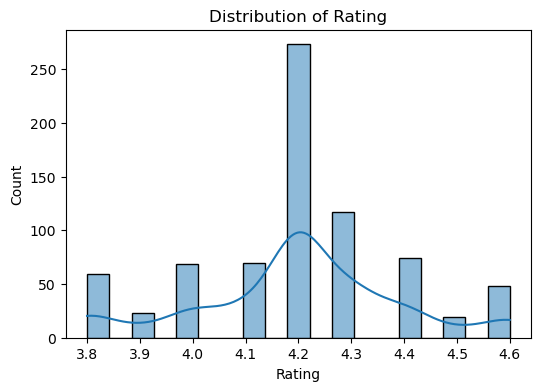

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], kde=True)
plt.title("Distribution of Rating")
plt.show()

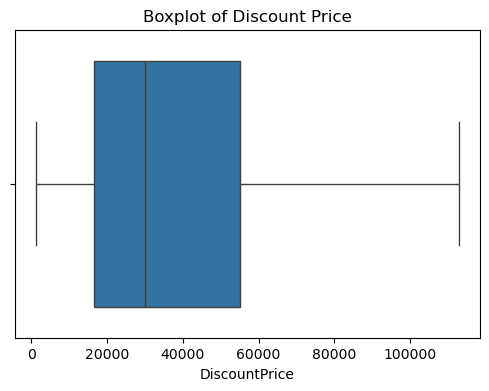

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['DiscountPrice'])
plt.title("Boxplot of Discount Price")
plt.show()

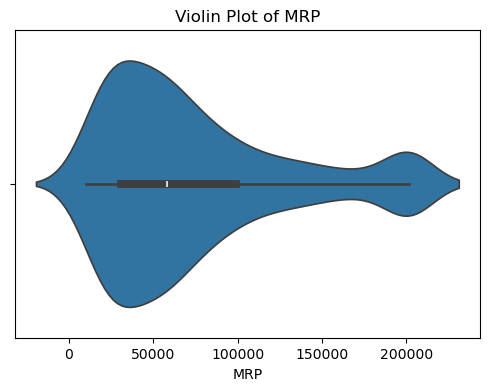

In [38]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df['MRP'])
plt.title("Violin Plot of MRP")
plt.show()


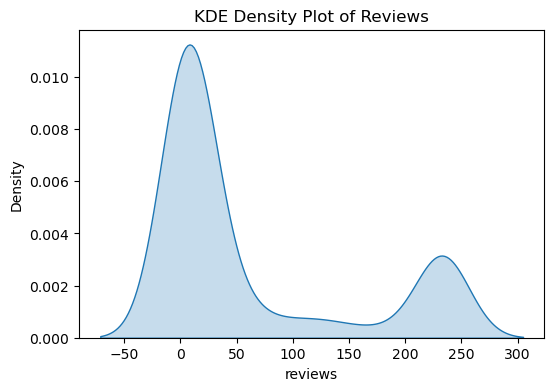

In [39]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['reviews'], fill=True)
plt.title("KDE Density Plot of Reviews")
plt.show()


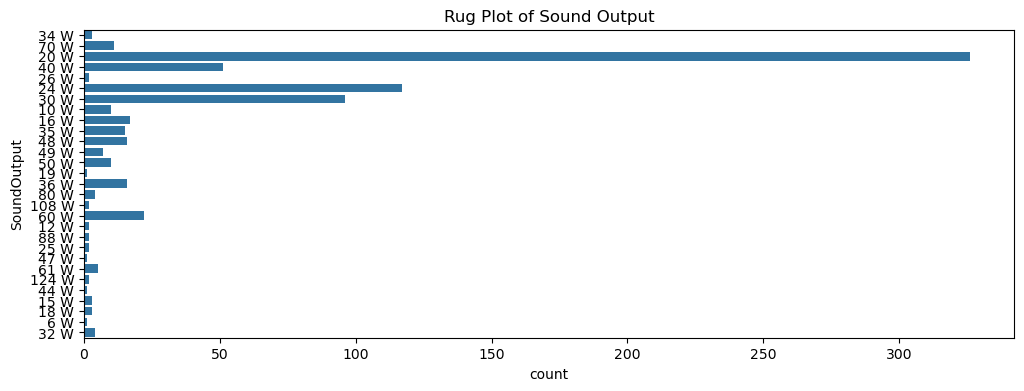

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(df['SoundOutput'])
plt.title("Rug Plot of Sound Output")
plt.show()

# Categorical variables

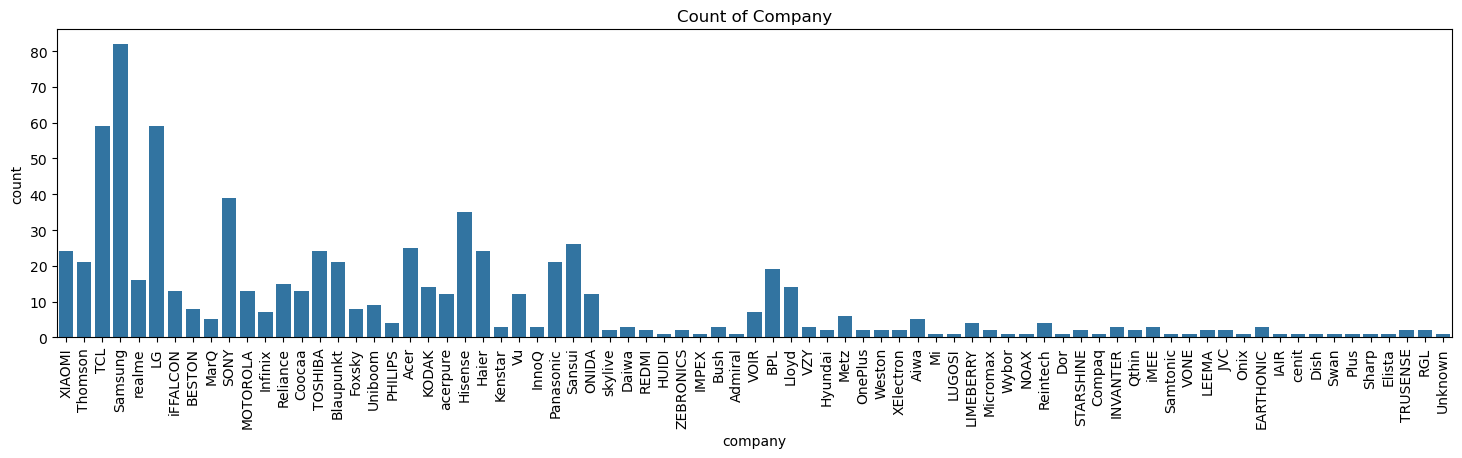

In [66]:
plt.figure(figsize=(18,4))
sns.countplot(x=df['company'])
plt.title("Count of Company")
plt.xticks(rotation=90)
plt.show()


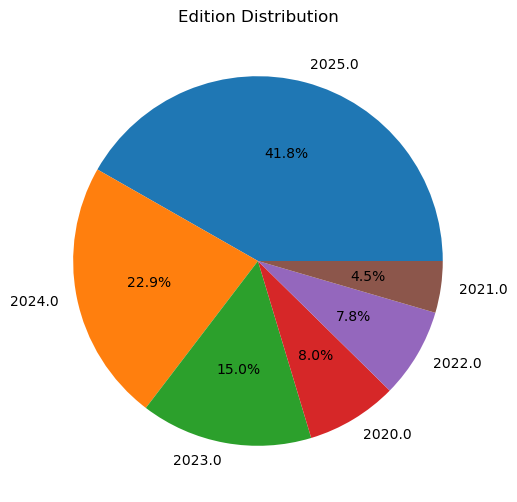

In [70]:
plt.figure(figsize=(6,6))
df['Edition'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Edition Distribution")
plt.ylabel("")
plt.show()


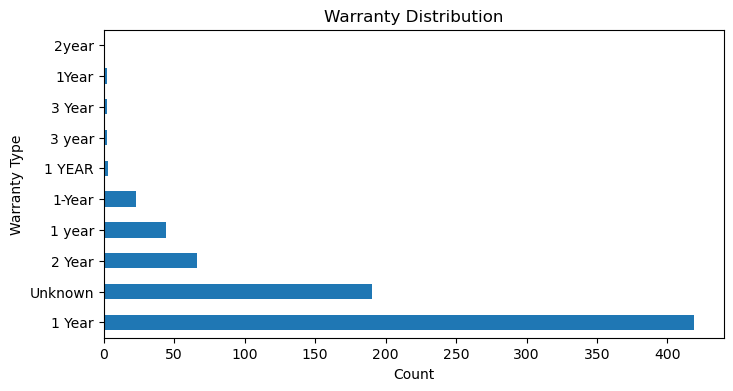

In [71]:
plt.figure(figsize=(8,4))
df['Warranty'].value_counts().plot(kind='barh')
plt.title("Warranty Distribution")
plt.xlabel("Count")
plt.ylabel("Warranty Type")
plt.show()


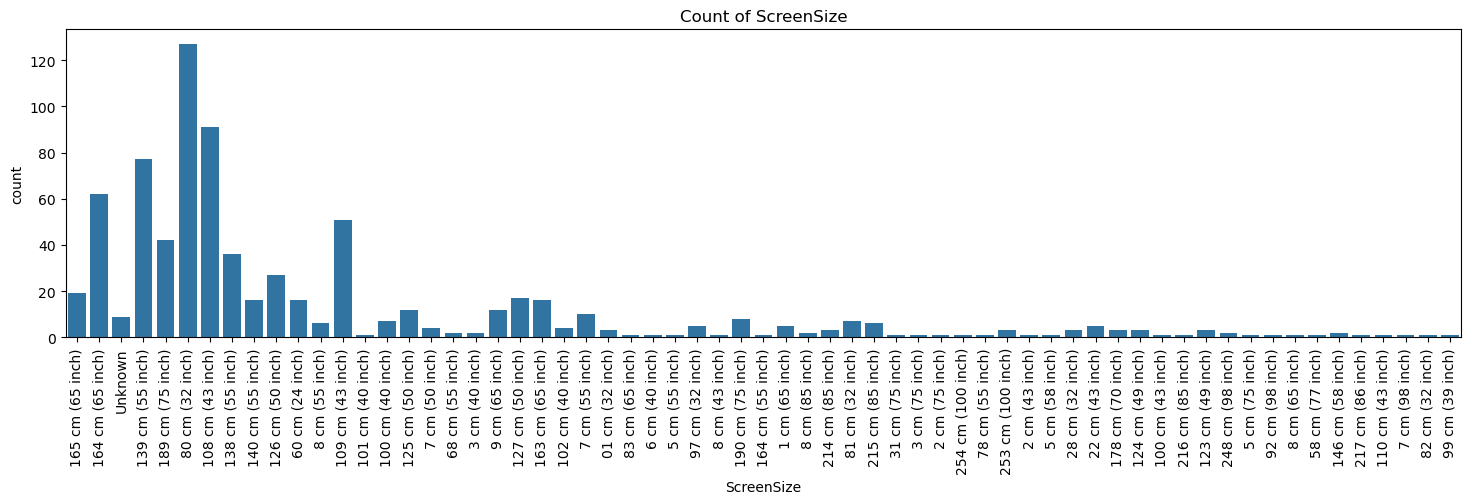

In [69]:

plt.figure(figsize=(18,4))
sns.countplot(x=df['ScreenSize'])
plt.title("Count of ScreenSize")
plt.xticks(rotation=90)
plt.show()


# BIVARIATE ANALYSIS

# # Categorical vs Categorical

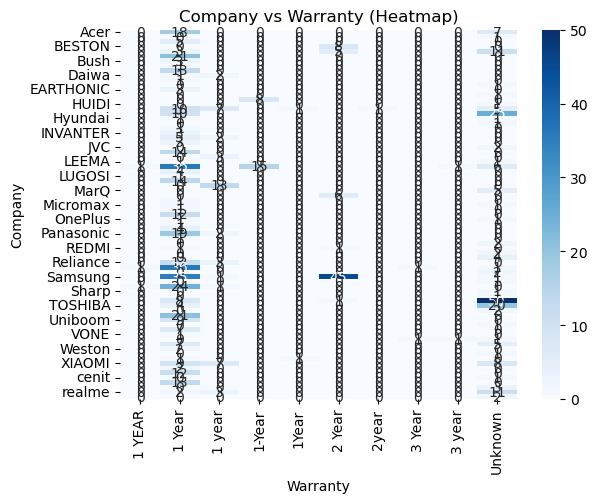

In [72]:
ct1 = pd.crosstab(df['company'], df['Warranty'])
sns.heatmap(ct1, annot=True, fmt='d', cmap="Blues")
plt.title("Company vs Warranty (Heatmap)")
plt.ylabel("Company")
plt.xlabel("Warranty")
plt.show()

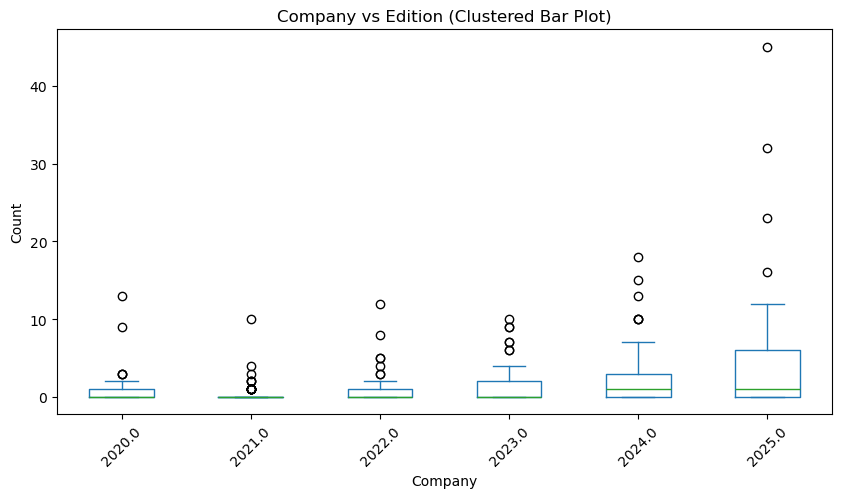

In [89]:
ct2 = pd.crosstab(df['company'], df['Edition'])
ct2.plot(kind='box', figsize=(10,5))
plt.title("Company vs Edition (Clustered Bar Plot)")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

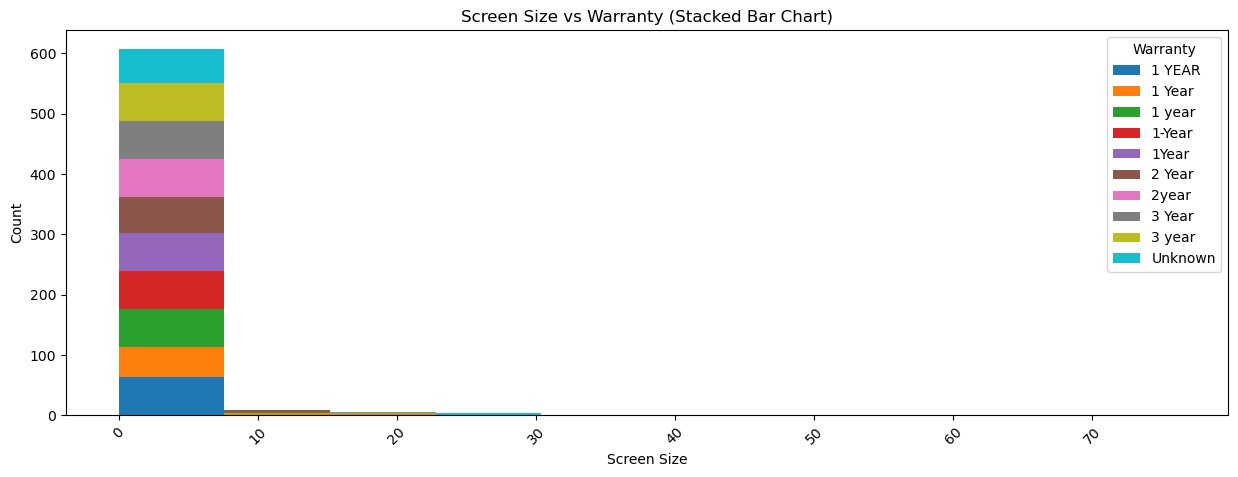

In [97]:
ct3 = pd.crosstab(df['ScreenSize'], df['Warranty'])
ct3.plot(kind='hist', stacked=True, figsize=(15,5))
plt.title("Screen Size vs Warranty (Stacked Bar Chart)")
plt.xlabel("Screen Size")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#  #Categorical vs Numerical


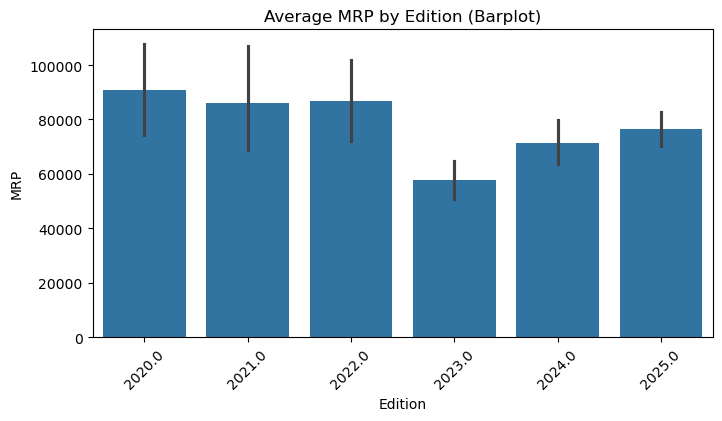

In [111]:
plt.figure(figsize=(8,4))
sns.barplot(x='Edition', y='MRP', data=df, estimator=np.mean)
plt.title("Average MRP by Edition (Barplot)")
plt.xticks(rotation=45)
plt.show()


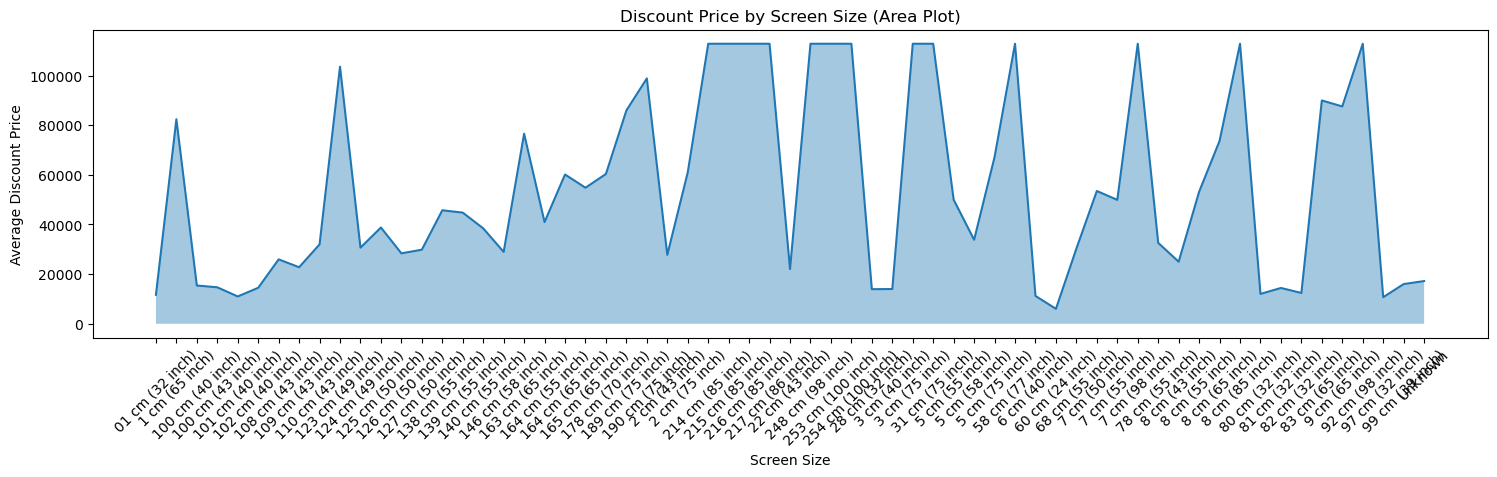

In [133]:
plt.figure(figsize=(18,4))
area_data = df.groupby('ScreenSize')['DiscountPrice'].mean().sort_index()

plt.fill_between(area_data.index, area_data.values, alpha=0.4)
plt.plot(area_data.index, area_data.values)

plt.title("Discount Price by Screen Size (Area Plot)")
plt.xlabel("Screen Size")
plt.ylabel("Average Discount Price")
plt.xticks(rotation=45)

plt.show()


# #Numerical vs Numerical


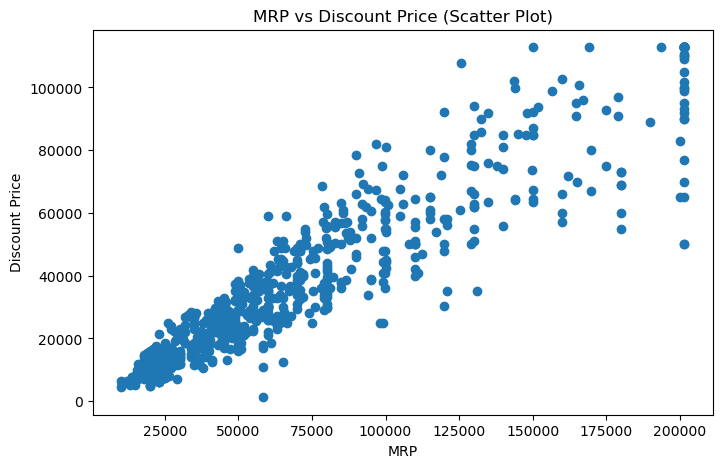

In [136]:
plt.figure(figsize=(8,5))
plt.scatter(df['MRP'], df['DiscountPrice'])
plt.title("MRP vs Discount Price (Scatter Plot)")
plt.xlabel("MRP")
plt.ylabel("Discount Price")
plt.show()


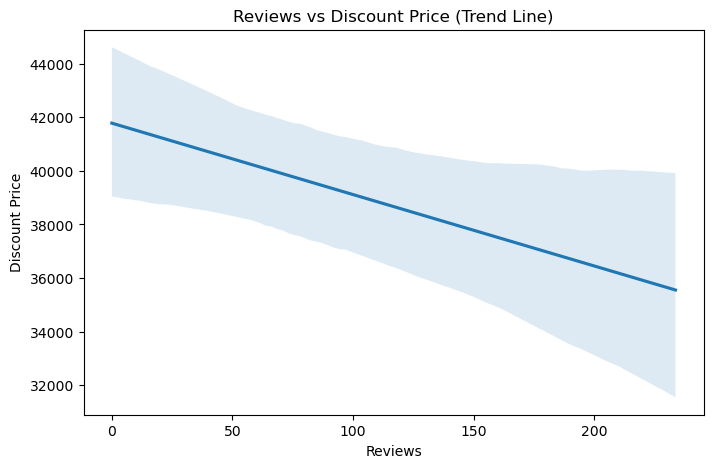

In [144]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['reviews'], y=df['DiscountPrice'], scatter=False)
plt.title("Reviews vs Discount Price (Trend Line)")
plt.xlabel("Reviews")
plt.ylabel("Discount Price")
plt.show()


# MULTIVARIATE ANALYSIS

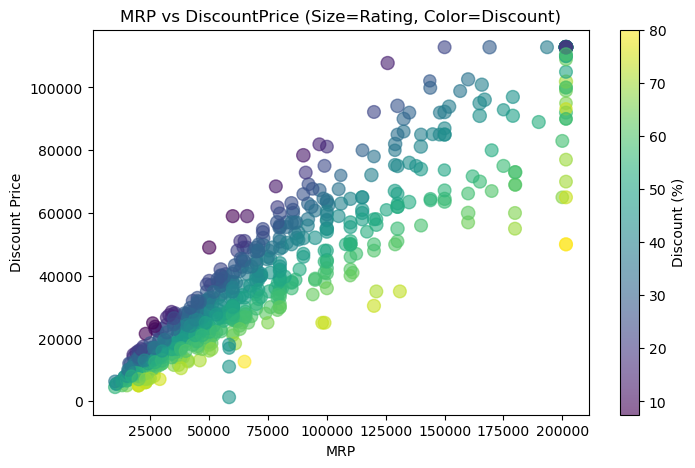

In [145]:
plt.figure(figsize=(8,5))
plt.scatter(
    df['MRP'], 
    df['DiscountPrice'], 
    s=df['Rating']*20,  
    c=df['Discount'],   #
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(label='Discount (%)')
plt.title("MRP vs DiscountPrice (Size=Rating, Color=Discount)")
plt.xlabel("MRP")
plt.ylabel("Discount Price")
plt.show()


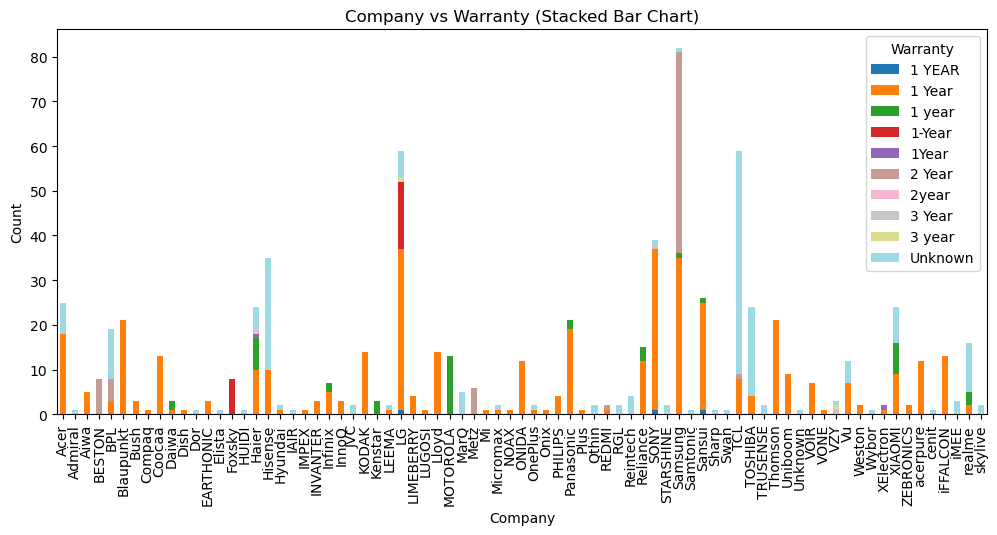

In [149]:
ct3 = pd.crosstab(df['company'], df['Warranty'])
ct3.plot(kind='bar', stacked=True, figsize=(12,5), colormap='tab20')
plt.title("Company vs Warranty (Stacked Bar Chart)")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

# Conclusion  